In [30]:
%matplotlib inline

from pandas import *
import pandas
#import pandas.io.data
from pandas import Series, DataFrame
pandas.set_option('display.notebook_repr_html', False)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc('figure', figsize = (10, 6))
# pandas.set_printoptions(notebook_repr_html = False)

In [6]:
iot_data = read_csv('wimp_weather.csv', index_col = 17, parse_dates = True)
iot_data.head()

                        measurementTime  winddir  windspeedmph  windgustmph  \
timestamp                                                                     
2015-10-27 10:29:58.457     04:29:57 AM       45           0.0          8.7   
2015-10-27 10:28:56.967     04:28:56 AM       45           0.0          8.7   
2015-10-27 10:28:20.067     04:27:54 AM        0           0.0          8.7   
2015-10-27 10:26:53.279     04:26:53 AM      315           1.5          8.7   
2015-10-27 10:26:13.432     04:25:51 AM      315           0.0          8.7   

                         windgustdir  windspdmph_avg2m  winddir_avg2m  \
timestamp                                                               
2015-10-27 10:29:58.457          270               0.0             45   
2015-10-27 10:28:56.967          270               0.5             19   
2015-10-27 10:28:20.067          270               1.1            336   
2015-10-27 10:26:53.279          270               0.7            325   
2015-10-

In [7]:
iot_data.tail()

                        measurementTime  winddir  windspeedmph  windgustmph  \
timestamp                                                                     
2015-07-23 20:52:50.160     02:52:50 PM      135           1.5         18.9   
2015-07-23 20:51:48.952     02:51:48 PM      315           4.4         18.9   
2015-07-23 20:50:47.724     02:50:47 PM       90           1.5         18.9   
2015-07-23 20:49:46.369     02:49:46 PM      315           5.8         18.9   
2015-07-23 20:48:44.954     02:48:44 PM      180           1.5         18.9   

                         windgustdir  windspdmph_avg2m  winddir_avg2m  \
timestamp                                                               
2015-07-23 20:52:50.160           45               3.4              1   
2015-07-23 20:51:48.952           45               4.1             19   
2015-07-23 20:50:47.724           45               2.9             28   
2015-07-23 20:49:46.369           45               2.1             37   
2015-07-

In [8]:
iot_data.index

DatetimeIndex(['2015-10-27 10:29:58.457000', '2015-10-27 10:28:56.967000',
               '2015-10-27 10:28:20.067000', '2015-10-27 10:26:53.279000',
               '2015-10-27 10:26:13.432000', '2015-10-27 10:26:22.529000',
               '2015-10-27 10:25:06.207000', '2015-10-27 10:23:49.560000',
               '2015-10-27 10:22:48.319000', '2015-10-27 10:21:46.566000',
               ...
               '2015-07-23 20:57:57.194000', '2015-07-23 20:56:55.168000',
               '2015-07-23 20:55:53.820000', '2015-07-23 20:54:52.715000',
               '2015-07-23 20:53:51.522000', '2015-07-23 20:52:50.160000',
               '2015-07-23 20:51:48.952000', '2015-07-23 20:50:47.724000',
               '2015-07-23 20:49:46.369000', '2015-07-23 20:48:44.954000'],
              dtype='datetime64[ns]', name='timestamp', length=117751, freq=None)

In [9]:
iot_data.iloc[1, 4]

270

In [31]:
s1 = iot_data['humidity'][20:]
s2 = iot_data['dewptf'][10: 25]
side_by_side(s1, s2)

timestamp                          timestamp                         
2015-10-27 10:13:55.867    62.9    2015-10-27 10:20:45.484    31.4473
2015-10-27 10:12:24.448    61.3    2015-10-27 10:20:02.194    30.6265
2015-10-27 10:11:21.623    62.3    2015-10-27 10:20:14.303    30.6265
2015-10-27 10:10:36.017    61.9    2015-10-27 10:18:36.936    31.0400
2015-10-27 10:10:50.969    61.9    2015-10-27 10:17:33.542    31.4473
2015-10-27 10:09:16.442    61.0    2015-10-27 10:16:48.260    31.4473
2015-10-27 10:08:16.249    61.3    2015-10-27 10:17:02.372    31.4473
2015-10-27 10:07:12.551    61.6    2015-10-27 10:15:29.563    31.4473
2015-10-27 10:06:11.416    62.4    2015-10-27 10:14:29.146    31.8489
2015-10-27 10:05:08.816    63.0    2015-10-27 10:13:40.560    31.8489
2015-10-27 10:04:07.445    62.1    2015-10-27 10:13:55.867    31.8489
2015-10-27 10:03:05.285    62.7    2015-10-27 10:12:24.448    31.4473
2015-10-27 10:02:03.838    63.2    2015-10-27 10:11:21.623    31.8489
2015-10-27 10:01:00.

In [32]:
(s1 + s2).dropna()

timestamp
2015-10-27 10:10:36.017    93.3473
2015-10-27 10:10:50.969    93.3473
2015-10-27 10:11:21.623    94.1489
2015-10-27 10:12:24.448    92.7473
2015-10-27 10:13:55.867    94.7489
dtype: float64

In [33]:
df = iot_data.ix[-10:, [3, 7]]
df

                         windgustmph  windgustmph_10m
timestamp                                            
2015-07-23 20:57:57.194         18.9             10.2
2015-07-23 20:56:55.168         18.9             10.2
2015-07-23 20:55:53.820         18.9             10.2
2015-07-23 20:54:52.715         18.9             10.2
2015-07-23 20:53:51.522         18.9             13.1
2015-07-23 20:52:50.160         18.9             13.1
2015-07-23 20:51:48.952         18.9             13.1
2015-07-23 20:50:47.724         18.9             13.1
2015-07-23 20:49:46.369         18.9             13.1
2015-07-23 20:48:44.954         18.9             13.1

In [34]:
iot_data['rainin'].max() 

18.899999999999999

In [35]:
iot_data.describe()

             winddir   windspeedmph    windgustmph    windgustdir  \
count  117751.000000  117751.000000  117751.000000  117751.000000   
mean      160.384481       1.552542      13.507850     188.451121   
std       102.397275       1.610921       6.267398     111.421528   
min         0.000000       0.000000       0.000000       0.000000   
25%        90.000000       0.000000       9.700000      90.000000   
50%       135.000000       1.500000      12.900000     225.000000   
75%       270.000000       2.900000      16.100000     270.000000   
max       338.000000      21.800000      43.600000     338.000000   

       windspdmph_avg2m  winddir_avg2m  windgustmph_10m  windgustdir_10m  \
count     117751.000000  117751.000000    117751.000000    117751.000000   
mean           1.182313     116.309271         5.634726       193.811297   
std            1.043053     108.626745         3.301661       108.064663   
min            0.000000       0.000000         0.000000         0.000000  

In [36]:
new_df = iot_data[((iot_data['humidity'] >= 50) & (iot_data['tempf'] >= 75) \
                  & (iot_data['dewptf'] >= 25) ) ]  
new_df.tail()

                        measurementTime  winddir  windspeedmph  windgustmph  \
timestamp                                                                     
2015-08-08 02:27:57.968     08:27:57 PM       90           0.0         18.9   
2015-07-27 15:07:58.462     09:07:58 AM       90           4.8          5.8   
2015-07-27 14:59:47.891     08:59:47 AM        0           1.6          5.8   
2015-07-27 14:57:45.435     08:57:45 AM       45           0.0          5.8   
2015-07-27 14:56:43.834     08:56:43 AM       90           0.0          5.8   

                         windgustdir  windspdmph_avg2m  winddir_avg2m  \
timestamp                                                               
2015-08-08 02:27:57.968          270               0.2             84   
2015-07-27 15:07:58.462          315               1.8             81   
2015-07-27 14:59:47.891          315               0.7             79   
2015-07-27 14:57:45.435          315               0.2             69   
2015-07-

In [37]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117751 entries, 2015-10-27 10:29:58.457000 to 2015-07-23 20:48:44.954000
Data columns (total 17 columns):
measurementTime     117751 non-null object
winddir             117751 non-null int64
windspeedmph        117751 non-null float64
windgustmph         117751 non-null float64
windgustdir         117751 non-null int64
windspdmph_avg2m    117751 non-null float64
winddir_avg2m       117751 non-null int64
windgustmph_10m     117751 non-null float64
windgustdir_10m     117751 non-null int64
humidity            117751 non-null float64
tempf               117751 non-null float64
rainin              117751 non-null float64
dailyrainin         117751 non-null float64
baromin             117751 non-null float64
dewptf              117751 non-null float64
batt_lvl            117751 non-null float64
light_lvl           117751 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 16.2+ MB


In [38]:
new_df_data = iot_data.iloc[:, 1:7]
new_df_data.tail()

                         winddir  windspeedmph  windgustmph  windgustdir  \
timestamp                                                                  
2015-07-23 20:52:50.160      135           1.5         18.9           45   
2015-07-23 20:51:48.952      315           4.4         18.9           45   
2015-07-23 20:50:47.724       90           1.5         18.9           45   
2015-07-23 20:49:46.369      315           5.8         18.9           45   
2015-07-23 20:48:44.954      180           1.5         18.9           45   

                         windspdmph_avg2m  winddir_avg2m  
timestamp                                                 
2015-07-23 20:52:50.160               3.4              1  
2015-07-23 20:51:48.952               4.1             19  
2015-07-23 20:50:47.724               2.9             28  
2015-07-23 20:49:46.369               2.1             37  
2015-07-23 20:48:44.954               2.3             31  

In [39]:
side_by_side(s1.ix[s2.index], s2)

timestamp                          timestamp                         
2015-10-27 10:20:45.484     NaN    2015-10-27 10:20:45.484    31.4473
2015-10-27 10:20:02.194     NaN    2015-10-27 10:20:02.194    30.6265
2015-10-27 10:20:14.303     NaN    2015-10-27 10:20:14.303    30.6265
2015-10-27 10:18:36.936     NaN    2015-10-27 10:18:36.936    31.0400
2015-10-27 10:17:33.542     NaN    2015-10-27 10:17:33.542    31.4473
2015-10-27 10:16:48.260     NaN    2015-10-27 10:16:48.260    31.4473
2015-10-27 10:17:02.372     NaN    2015-10-27 10:17:02.372    31.4473
2015-10-27 10:15:29.563     NaN    2015-10-27 10:15:29.563    31.4473
2015-10-27 10:14:29.146     NaN    2015-10-27 10:14:29.146    31.8489
2015-10-27 10:13:40.560     NaN    2015-10-27 10:13:40.560    31.8489
2015-10-27 10:13:55.867    62.9    2015-10-27 10:13:55.867    31.8489
2015-10-27 10:12:24.448    61.3    2015-10-27 10:12:24.448    31.4473
2015-10-27 10:11:21.623    62.3    2015-10-27 10:11:21.623    31.8489
2015-10-27 10:10:36.

In [40]:
b , c = s1.align(s2, join = 'inner')
side_by_side(b, c)

timestamp                          timestamp                         
2015-10-27 10:13:55.867    62.9    2015-10-27 10:13:55.867    31.8489
2015-10-27 10:12:24.448    61.3    2015-10-27 10:12:24.448    31.4473
2015-10-27 10:11:21.623    62.3    2015-10-27 10:11:21.623    31.8489
2015-10-27 10:10:36.017    61.9    2015-10-27 10:10:36.017    31.4473
2015-10-27 10:10:50.969    61.9    2015-10-27 10:10:50.969    31.4473
Name: humidity, dtype: float64     Name: dewptf, dtype: float64      


In [41]:
df[:11].T

timestamp        2015-07-23 20:57:57.194  2015-07-23 20:56:55.168  \
windgustmph                         18.9                     18.9   
windgustmph_10m                     10.2                     10.2   

timestamp        2015-07-23 20:55:53.820  2015-07-23 20:54:52.715  \
windgustmph                         18.9                     18.9   
windgustmph_10m                     10.2                     10.2   

timestamp        2015-07-23 20:53:51.522  2015-07-23 20:52:50.160  \
windgustmph                         18.9                     18.9   
windgustmph_10m                     13.1                     13.1   

timestamp        2015-07-23 20:51:48.952  2015-07-23 20:50:47.724  \
windgustmph                         18.9                     18.9   
windgustmph_10m                     13.1                     13.1   

timestamp        2015-07-23 20:49:46.369  2015-07-23 20:48:44.954  
windgustmph                         18.9                     18.9  
windgustmph_10m                 

In [42]:
df.mean()

windgustmph        18.90
windgustmph_10m    11.94
dtype: float64

In [43]:
df.describe()

        windgustmph  windgustmph_10m
count  1.000000e+01        10.000000
mean   1.890000e+01        11.940000
std    3.744889e-15         1.497554
min    1.890000e+01        10.200000
25%    1.890000e+01        10.200000
50%    1.890000e+01        13.100000
75%    1.890000e+01        13.100000
max    1.890000e+01        13.100000

In [44]:
df.mean(1, skipna=False) 
# df.apply(np.mean, axis = 1) : Can be used instead of the one above, but slower

timestamp
2015-07-23 20:57:57.194    14.55
2015-07-23 20:56:55.168    14.55
2015-07-23 20:55:53.820    14.55
2015-07-23 20:54:52.715    14.55
2015-07-23 20:53:51.522    16.00
2015-07-23 20:52:50.160    16.00
2015-07-23 20:51:48.952    16.00
2015-07-23 20:50:47.724    16.00
2015-07-23 20:49:46.369    16.00
2015-07-23 20:48:44.954    16.00
dtype: float64

In [45]:
iot_data.head()

                        measurementTime  winddir  windspeedmph  windgustmph  \
timestamp                                                                     
2015-10-27 10:29:58.457     04:29:57 AM       45           0.0          8.7   
2015-10-27 10:28:56.967     04:28:56 AM       45           0.0          8.7   
2015-10-27 10:28:20.067     04:27:54 AM        0           0.0          8.7   
2015-10-27 10:26:53.279     04:26:53 AM      315           1.5          8.7   
2015-10-27 10:26:13.432     04:25:51 AM      315           0.0          8.7   

                         windgustdir  windspdmph_avg2m  winddir_avg2m  \
timestamp                                                               
2015-10-27 10:29:58.457          270               0.0             45   
2015-10-27 10:28:56.967          270               0.5             19   
2015-10-27 10:28:20.067          270               1.1            336   
2015-10-27 10:26:53.279          270               0.7            325   
2015-10-

In [46]:
iot_data1 = iot_data.drop(['measurementTime'], axis = 1)
iot_data1.head()

                         winddir  windspeedmph  windgustmph  windgustdir  \
timestamp                                                                  
2015-10-27 10:29:58.457       45           0.0          8.7          270   
2015-10-27 10:28:56.967       45           0.0          8.7          270   
2015-10-27 10:28:20.067        0           0.0          8.7          270   
2015-10-27 10:26:53.279      315           1.5          8.7          270   
2015-10-27 10:26:13.432      315           0.0          8.7          270   

                         windspdmph_avg2m  winddir_avg2m  windgustmph_10m  \
timestamp                                                                   
2015-10-27 10:29:58.457               0.0             45              3.2   
2015-10-27 10:28:56.967               0.5             19              3.2   
2015-10-27 10:28:20.067               1.1            336              3.2   
2015-10-27 10:26:53.279               0.7            325              3.2   
2015-

In [47]:
new_df1 = new_df.drop(['measurementTime'], axis = 1)

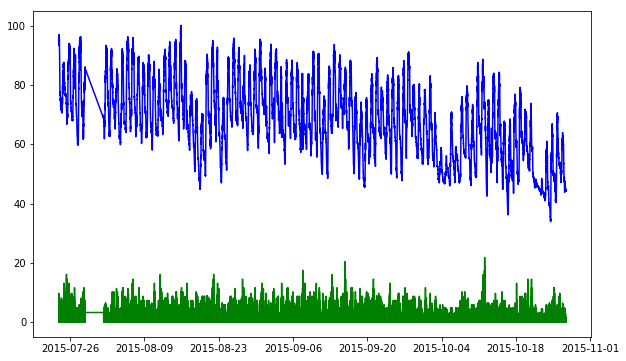

In [48]:
plt.plot(iot_data['windspeedmph'], color = "green", label="wind speed")
plt.plot(iot_data['tempf'], color = "blue", label = "temperature")

The above graph shows a decrease in temperature between July 27 - October 27, which is inline with seasonal changes from summer to winter. The wind speed seems to be oscillating between 5 - 20mph. Need sure if seasonality changes play a vital role to the threshold of the oscillation.

In [49]:
iot_data1 = iot_data.tz_localize('GMT') 
iot_data1.head()

                                 measurementTime  winddir  windspeedmph  \
timestamp                                                                 
2015-10-27 10:29:58.457000+00:00     04:29:57 AM       45           0.0   
2015-10-27 10:28:56.967000+00:00     04:28:56 AM       45           0.0   
2015-10-27 10:28:20.067000+00:00     04:27:54 AM        0           0.0   
2015-10-27 10:26:53.279000+00:00     04:26:53 AM      315           1.5   
2015-10-27 10:26:13.432000+00:00     04:25:51 AM      315           0.0   

                                  windgustmph  windgustdir  windspdmph_avg2m  \
timestamp                                                                      
2015-10-27 10:29:58.457000+00:00          8.7          270               0.0   
2015-10-27 10:28:56.967000+00:00          8.7          270               0.5   
2015-10-27 10:28:20.067000+00:00          8.7          270               1.1   
2015-10-27 10:26:53.279000+00:00          8.7          270               0

## Diagnostics

In [50]:
iot_data1.describe()

             winddir   windspeedmph    windgustmph    windgustdir  \
count  117751.000000  117751.000000  117751.000000  117751.000000   
mean      160.384481       1.552542      13.507850     188.451121   
std       102.397275       1.610921       6.267398     111.421528   
min         0.000000       0.000000       0.000000       0.000000   
25%        90.000000       0.000000       9.700000      90.000000   
50%       135.000000       1.500000      12.900000     225.000000   
75%       270.000000       2.900000      16.100000     270.000000   
max       338.000000      21.800000      43.600000     338.000000   

       windspdmph_avg2m  winddir_avg2m  windgustmph_10m  windgustdir_10m  \
count     117751.000000  117751.000000    117751.000000    117751.000000   
mean           1.182313     116.309271         5.634726       193.811297   
std            1.043053     108.626745         3.301661       108.064663   
min            0.000000       0.000000         0.000000         0.000000  

## Time Series

In [51]:
iot_data.head()

                        measurementTime  winddir  windspeedmph  windgustmph  \
timestamp                                                                     
2015-10-27 10:29:58.457     04:29:57 AM       45           0.0          8.7   
2015-10-27 10:28:56.967     04:28:56 AM       45           0.0          8.7   
2015-10-27 10:28:20.067     04:27:54 AM        0           0.0          8.7   
2015-10-27 10:26:53.279     04:26:53 AM      315           1.5          8.7   
2015-10-27 10:26:13.432     04:25:51 AM      315           0.0          8.7   

                         windgustdir  windspdmph_avg2m  winddir_avg2m  \
timestamp                                                               
2015-10-27 10:29:58.457          270               0.0             45   
2015-10-27 10:28:56.967          270               0.5             19   
2015-10-27 10:28:20.067          270               1.1            336   
2015-10-27 10:26:53.279          270               0.7            325   
2015-10-

In [52]:
iot = iot_data[ ['windgustmph', 'windspeedmph', 'dailyrainin', 'dewptf', 'humidity', 'tempf'] ].tail()
iot    

                         windgustmph  windspeedmph  dailyrainin   dewptf  \
timestamp                                                                  
2015-07-23 20:52:50.160         18.9           1.5          0.0  27.3966   
2015-07-23 20:51:48.952         18.9           4.4          0.0  27.3966   
2015-07-23 20:50:47.724         18.9           1.5          0.0  27.3966   
2015-07-23 20:49:46.369         18.9           5.8          0.0  27.3966   
2015-07-23 20:48:44.954         18.9           1.5          0.0  27.3966   

                         humidity  tempf  
timestamp                                 
2015-07-23 20:52:50.160       9.3   95.0  
2015-07-23 20:51:48.952       9.1   95.1  
2015-07-23 20:50:47.724       9.0   95.0  
2015-07-23 20:49:46.369       9.0   95.5  
2015-07-23 20:48:44.954       9.5   95.3  

In [53]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117751 entries, 2015-10-27 10:29:58.457000 to 2015-07-23 20:48:44.954000
Data columns (total 17 columns):
measurementTime     117751 non-null object
winddir             117751 non-null int64
windspeedmph        117751 non-null float64
windgustmph         117751 non-null float64
windgustdir         117751 non-null int64
windspdmph_avg2m    117751 non-null float64
winddir_avg2m       117751 non-null int64
windgustmph_10m     117751 non-null float64
windgustdir_10m     117751 non-null int64
humidity            117751 non-null float64
tempf               117751 non-null float64
rainin              117751 non-null float64
dailyrainin         117751 non-null float64
baromin             117751 non-null float64
dewptf              117751 non-null float64
batt_lvl            117751 non-null float64
light_lvl           117751 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 16.2+ MB


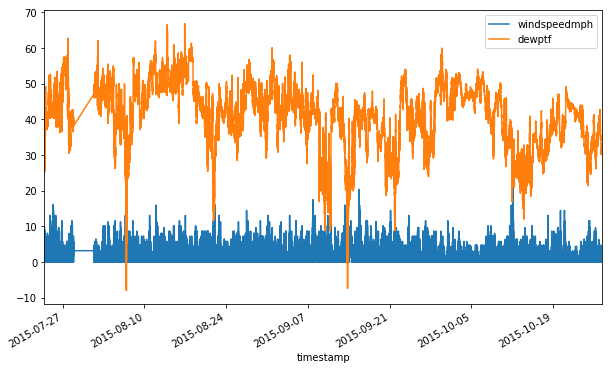

In [54]:
iot = iot_data[ ['windspeedmph', 'dewptf'] ]
iot.plot()

In [55]:
iot_data.tempf.idxmax()

Timestamp('2015-08-15 21:42:29.074000')

In [56]:
def peak_date(series):
    return series.idxmax()
iot_data.apply(peak_date)

ValueError: ("could not convert string to float: '02:48:44 PM'", 'occurred at index measurementTime')

In [57]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

windgustmph        0.0
windgustmph_10m    2.9
dtype: float64

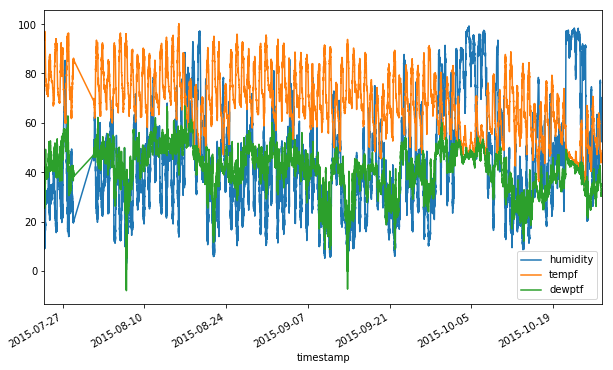

In [58]:
iot_data[['humidity', 'tempf', 'dewptf']].plot()

In [59]:
iot_data.ix[5]

measurementTime     04:25:51 AM
winddir                     315
windspeedmph                  0
windgustmph                 8.7
windgustdir                 270
windspdmph_avg2m            0.1
winddir_avg2m               347
windgustmph_10m             1.6
windgustdir_10m             315
humidity                   65.7
tempf                      44.6
rainin                        0
dailyrainin                0.03
baromin                 29.9484
dewptf                  33.0199
batt_lvl                   4.09
light_lvl                     0
Name: 2015-10-27 10:26:22.529000, dtype: object

In [61]:
#iot_data.ix[2].plot(kind = 'bar') 

### Extra Analyzing

In [35]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
np.set_printoptions(threshold = 15)   # this limit maximum numbers of rows

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [33]:
iot = pd.read_csv('wimp_weather.csv', index_col = 17, parse_dates = True)

In [34]:
iot_wimp = iot.drop(['measurementTime'], axis = 1)

In [37]:
df = iot_wimp.values
df

array([[  45.    ,    0.    ,    8.7   , ...,   33.0199,    4.09  ,    0.    ],
       [  45.    ,    0.    ,    8.7   , ...,   33.0199,    4.09  ,    0.    ],
       [   0.    ,    0.    ,    8.7   , ...,   33.0199,    4.09  ,    0.    ],
       ..., 
       [  90.    ,    1.5   ,   18.9   , ...,   27.3966,    4.31  ,    3.07  ],
       [ 315.    ,    5.8   ,   18.9   , ...,   27.3966,    4.32  ,    3.07  ],
       [ 180.    ,    1.5   ,   18.9   , ...,   27.3966,    4.32  ,    3.07  ]])

In [35]:
dates = pd.date_range('2015-07-23', periods = 117751, freq = 'S')
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-07-23 00:00:00, ..., 2015-07-24 08:42:30]
Length: 117751, Freq: S, Timezone: None

In [2]:
AO = Series(df[:, 1], index = dates) 
AO

NameError: name 'Series' is not defined

In [29]:
AO.plot()

NameError: name 'AO' is not defined

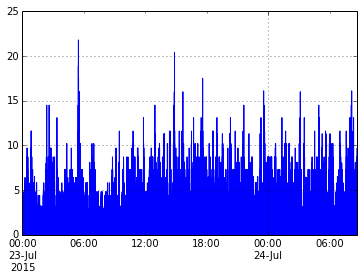

In [38]:
# Or even smaller time interval
AO['2015-07':'2015-08'].plot()

In [49]:
AO[120]

0.0

In [50]:
AO['2015-07']

2015-07-23 00:00:00    0.0
2015-07-23 00:00:01    0.0
2015-07-23 00:00:02    0.0
2015-07-23 00:00:03    1.5
2015-07-23 00:00:04    0.0
2015-07-23 00:00:05    0.0
2015-07-23 00:00:06    0.0
2015-07-23 00:00:07    0.0
2015-07-23 00:00:08    0.0
2015-07-23 00:00:09    0.0
2015-07-23 00:00:10    0.0
2015-07-23 00:00:11    0.0
2015-07-23 00:00:12    0.0
2015-07-23 00:00:13    0.0
2015-07-23 00:00:14    0.0
...
2015-07-24 08:42:16    5.8
2015-07-24 08:42:17    4.4
2015-07-24 08:42:18    5.8
2015-07-24 08:42:19    1.6
2015-07-24 08:42:20    4.4
2015-07-24 08:42:21    4.8
2015-07-24 08:42:22    1.5
2015-07-24 08:42:23    1.5
2015-07-24 08:42:24    1.5
2015-07-24 08:42:25    1.6
2015-07-24 08:42:26    1.5
2015-07-24 08:42:27    4.4
2015-07-24 08:42:28    1.5
2015-07-24 08:42:29    5.8
2015-07-24 08:42:30    1.5
Freq: S, Length: 117751

In [51]:
AO[AO > 5]

2015-07-23 00:13:06    5.8
2015-07-23 00:15:06    5.8
2015-07-23 00:15:07    6.4
2015-07-23 00:15:13    5.8
2015-07-23 00:25:26    5.8
2015-07-23 00:25:37    8.1
2015-07-23 00:25:49    5.8
2015-07-23 00:25:51    8.7
2015-07-23 00:25:53    7.3
2015-07-23 00:26:02    8.7
2015-07-23 00:26:14    5.8
2015-07-23 00:26:30    7.3
2015-07-23 00:26:34    5.8
2015-07-23 00:26:36    7.3
2015-07-23 00:26:37    8.1
...
2015-07-24 08:36:54    5.8
2015-07-24 08:36:59    6.4
2015-07-24 08:37:03    5.8
2015-07-24 08:39:20    6.4
2015-07-24 08:39:42    8.7
2015-07-24 08:40:10    5.8
2015-07-24 08:40:31    5.8
2015-07-24 08:41:03    5.8
2015-07-24 08:42:05    8.1
2015-07-24 08:42:06    5.8
2015-07-24 08:42:10    7.3
2015-07-24 08:42:11    9.7
2015-07-24 08:42:16    5.8
2015-07-24 08:42:18    5.8
2015-07-24 08:42:29    5.8
Length: 3415

In [52]:
noa = Series(df[:, 4], index = dates)
noa

2015-07-23 00:00:00    0.0
2015-07-23 00:00:01    0.5
2015-07-23 00:00:02    1.1
2015-07-23 00:00:03    0.7
2015-07-23 00:00:04    0.1
2015-07-23 00:00:05    0.1
2015-07-23 00:00:06    0.0
2015-07-23 00:00:07    0.0
2015-07-23 00:00:08    0.0
2015-07-23 00:00:09    0.0
2015-07-23 00:00:10    0.0
2015-07-23 00:00:11    0.0
2015-07-23 00:00:12    0.0
2015-07-23 00:00:13    0.0
2015-07-23 00:00:14    0.0
...
2015-07-24 08:42:16    2.9
2015-07-24 08:42:17    3.5
2015-07-24 08:42:18    3.1
2015-07-24 08:42:19    2.1
2015-07-24 08:42:20    2.6
2015-07-24 08:42:21    3.1
2015-07-24 08:42:22    2.7
2015-07-24 08:42:23    1.6
2015-07-24 08:42:24    1.2
2015-07-24 08:42:25    2.3
2015-07-24 08:42:26    3.4
2015-07-24 08:42:27    4.1
2015-07-24 08:42:28    2.9
2015-07-24 08:42:29    2.1
2015-07-24 08:42:30    2.3
Freq: S, Length: 117751

In [53]:
noa.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-07-23 00:00:00, ..., 2015-07-24 08:42:30]
Length: 117751, Freq: S, Timezone: None

In [54]:
aonao = DataFrame({'AO' : AO, 'noa' : noa})
aonao

                      AO  noa
2015-07-23 00:00:00  0.0  0.0
2015-07-23 00:00:01  0.0  0.5
2015-07-23 00:00:02  0.0  1.1
2015-07-23 00:00:03  1.5  0.7
2015-07-23 00:00:04  0.0  0.1
2015-07-23 00:00:05  0.0  0.1
2015-07-23 00:00:06  0.0  0.0
2015-07-23 00:00:07  0.0  0.0
2015-07-23 00:00:08  0.0  0.0
2015-07-23 00:00:09  0.0  0.0
2015-07-23 00:00:10  0.0  0.0
2015-07-23 00:00:11  0.0  0.0
2015-07-23 00:00:12  0.0  0.0
2015-07-23 00:00:13  0.0  0.0
2015-07-23 00:00:14  0.0  0.0
2015-07-23 00:00:15  0.0  0.0
2015-07-23 00:00:16  0.0  0.0
2015-07-23 00:00:17  0.0  0.0
2015-07-23 00:00:18  0.0  0.0
2015-07-23 00:00:19  0.0  0.4
2015-07-23 00:00:20  0.0  0.4
2015-07-23 00:00:21  1.5  1.0
2015-07-23 00:00:22  1.5  0.7
2015-07-23 00:00:23  0.0  0.0
2015-07-23 00:00:24  0.0  0.0
2015-07-23 00:00:25  0.0  0.2
2015-07-23 00:00:26  0.0  0.5
2015-07-23 00:00:27  0.0  0.5
2015-07-23 00:00:28  0.0  0.3
2015-07-23 00:00:29  0.0  0.2
2015-07-23 00:00:30  0.0  0.0
2015-07-23 00:00:31  0.0  0.0
2015-07-23

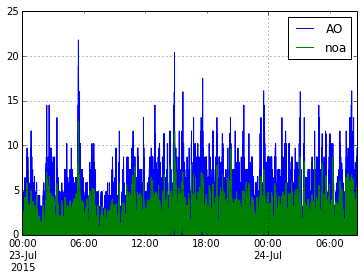

In [55]:
aonao.plot()

In [56]:
aonao.head()

                      AO  noa
2015-07-23 00:00:00  0.0  0.0
2015-07-23 00:00:01  0.0  0.5
2015-07-23 00:00:02  0.0  1.1
2015-07-23 00:00:03  1.5  0.7
2015-07-23 00:00:04  0.0  0.1

[5 rows x 2 columns]

In [57]:
aonao['noa']

2015-07-23 00:00:00    0.0
2015-07-23 00:00:01    0.5
2015-07-23 00:00:02    1.1
2015-07-23 00:00:03    0.7
2015-07-23 00:00:04    0.1
2015-07-23 00:00:05    0.1
2015-07-23 00:00:06    0.0
2015-07-23 00:00:07    0.0
2015-07-23 00:00:08    0.0
2015-07-23 00:00:09    0.0
2015-07-23 00:00:10    0.0
2015-07-23 00:00:11    0.0
2015-07-23 00:00:12    0.0
2015-07-23 00:00:13    0.0
2015-07-23 00:00:14    0.0
...
2015-07-24 08:42:16    2.9
2015-07-24 08:42:17    3.5
2015-07-24 08:42:18    3.1
2015-07-24 08:42:19    2.1
2015-07-24 08:42:20    2.6
2015-07-24 08:42:21    3.1
2015-07-24 08:42:22    2.7
2015-07-24 08:42:23    1.6
2015-07-24 08:42:24    1.2
2015-07-24 08:42:25    2.3
2015-07-24 08:42:26    3.4
2015-07-24 08:42:27    4.1
2015-07-24 08:42:28    2.9
2015-07-24 08:42:29    2.1
2015-07-24 08:42:30    2.3
Freq: S, Name: noa, Length: 117751

In [58]:
aonao['Diff'] = aonao['AO'] - aonao['noa']
aonao.head()

                      AO  noa  Diff
2015-07-23 00:00:00  0.0  0.0   0.0
2015-07-23 00:00:01  0.0  0.5  -0.5
2015-07-23 00:00:02  0.0  1.1  -1.1
2015-07-23 00:00:03  1.5  0.7   0.8
2015-07-23 00:00:04  0.0  0.1  -0.1

[5 rows x 3 columns]

In [59]:
del aonao['Diff']
aonao.tail()

                      AO  noa
2015-07-24 08:42:26  1.5  3.4
2015-07-24 08:42:27  4.4  4.1
2015-07-24 08:42:28  1.5  2.9
2015-07-24 08:42:29  5.8  2.1
2015-07-24 08:42:30  1.5  2.3

[5 rows x 2 columns]

In [60]:
aonao['2015-05':'2015-08']

                      AO  noa
2015-07-23 00:00:00  0.0  0.0
2015-07-23 00:00:01  0.0  0.5
2015-07-23 00:00:02  0.0  1.1
2015-07-23 00:00:03  1.5  0.7
2015-07-23 00:00:04  0.0  0.1
2015-07-23 00:00:05  0.0  0.1
2015-07-23 00:00:06  0.0  0.0
2015-07-23 00:00:07  0.0  0.0
2015-07-23 00:00:08  0.0  0.0
2015-07-23 00:00:09  0.0  0.0
2015-07-23 00:00:10  0.0  0.0
2015-07-23 00:00:11  0.0  0.0
2015-07-23 00:00:12  0.0  0.0
2015-07-23 00:00:13  0.0  0.0
2015-07-23 00:00:14  0.0  0.0
2015-07-23 00:00:15  0.0  0.0
2015-07-23 00:00:16  0.0  0.0
2015-07-23 00:00:17  0.0  0.0
2015-07-23 00:00:18  0.0  0.0
2015-07-23 00:00:19  0.0  0.4
2015-07-23 00:00:20  0.0  0.4
2015-07-23 00:00:21  1.5  1.0
2015-07-23 00:00:22  1.5  0.7
2015-07-23 00:00:23  0.0  0.0
2015-07-23 00:00:24  0.0  0.0
2015-07-23 00:00:25  0.0  0.2
2015-07-23 00:00:26  0.0  0.5
2015-07-23 00:00:27  0.0  0.5
2015-07-23 00:00:28  0.0  0.3
2015-07-23 00:00:29  0.0  0.2
2015-07-23 00:00:30  0.0  0.0
2015-07-23 00:00:31  0.0  0.0
2015-07-23

In [61]:
aonao.describe()

                  AO            noa
count  117751.000000  117751.000000
mean        1.552542       1.182313
std         1.610921       1.043053
min         0.000000       0.000000
25%         0.000000       0.400000
50%         1.500000       1.000000
75%         2.900000       1.700000
max        21.800000      12.700000

[8 rows x 2 columns]

/usr/lib/pymodules/python2.7/matplotlib/axes.py:2536: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=45, right=45
  + 'left=%s, right=%s') % (left, right))


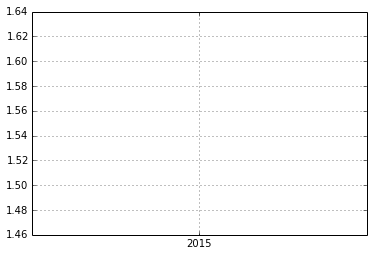

In [62]:
AO_mm = AO.resample("A")
AO_mm.plot(style='g--')

In [138]:
np.log(iot_wimp).head()

                             winddir  windspeedmph  windgustmph  windgustdir  \
timestamp                                                                      
2015-10-27 10:29:58.457000  3.806662          -inf     2.163323     5.598422   
2015-10-27 10:28:56.967000  3.806662          -inf     2.163323     5.598422   
2015-10-27 10:28:20.067000      -inf          -inf     2.163323     5.598422   
2015-10-27 10:26:53.279000  5.752573      0.405465     2.163323     5.598422   
2015-10-27 10:26:13.432000  5.752573          -inf     2.163323     5.598422   

                            windspdmph_avg2m  winddir_avg2m  windgustmph_10m  \
timestamp                                                                      
2015-10-27 10:29:58.457000              -inf       3.806662         1.163151   
2015-10-27 10:28:56.967000         -0.693147       2.944439         1.163151   
2015-10-27 10:28:20.067000          0.095310       5.817111         1.163151   
2015-10-27 10:26:53.279000         -0.3

# More Analysis

In [25]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

path = os.getcwd() + '/wimp_weather.csv'  
iot_data1 = pd.read_csv(path, index_col = 17, parse_dates = True)  

iot_data = iot_data1.drop(['measurementTime', 'winddir', 'windgustdir', 'winddir_avg2m', 'windgustdir_10m', 'batt_lvl', 'light_lvl'], axis = 1)
iot_data.head()

                            windspeedmph  windgustmph  windspdmph_avg2m  \
timestamp                                                                 
2015-10-27 10:29:58.457000           0.0          8.7               0.0   
2015-10-27 10:28:56.967000           0.0          8.7               0.5   
2015-10-27 10:28:20.067000           0.0          8.7               1.1   
2015-10-27 10:26:53.279000           1.5          8.7               0.7   
2015-10-27 10:26:13.432000           0.0          8.7               0.1   

                            windgustmph_10m  tempf  rainin  dailyrainin  \
timestamp                                                                 
2015-10-27 10:29:58.457000              3.2   44.2       0         0.03   
2015-10-27 10:28:56.967000              3.2   44.4       0         0.03   
2015-10-27 10:28:20.067000              3.2   44.4       0         0.03   
2015-10-27 10:26:53.279000              3.2   44.5       0         0.03   
2015-10-27 10:26:13.4320

In [26]:
x = iot_data.ix[:, 0:10]
y = iot_data.ix[:, 9]
y.head()

timestamp
2015-10-27 10:29:58.457000    65.4
2015-10-27 10:28:56.967000    65.3
2015-10-27 10:28:20.067000    65.6
2015-10-27 10:26:53.279000    64.8
2015-10-27 10:26:13.432000    65.7
Name: humidity, dtype: float64

In [27]:
X = x.values
Y = y.values
Y

array([ 65.4,  65.3,  65.6, ...,   9. ,   9. ,   9.5])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# <!-- collapse=True -->

# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0. Return

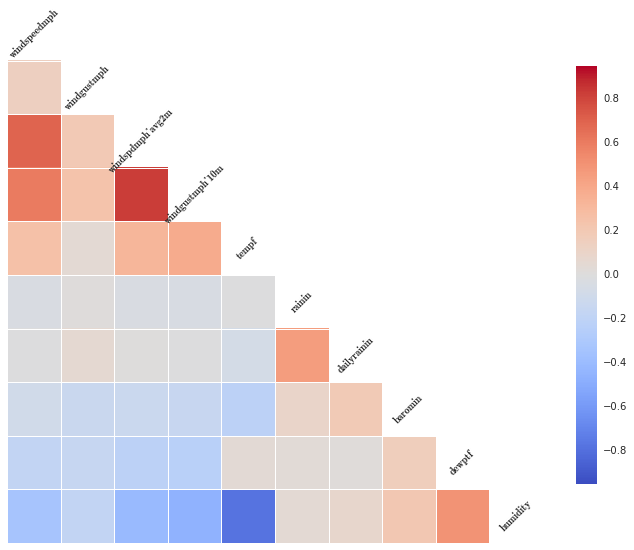

In [30]:
plt.figure(figsize=(12, 10))
_ = sns.corrplot(iot_data, annot=False)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


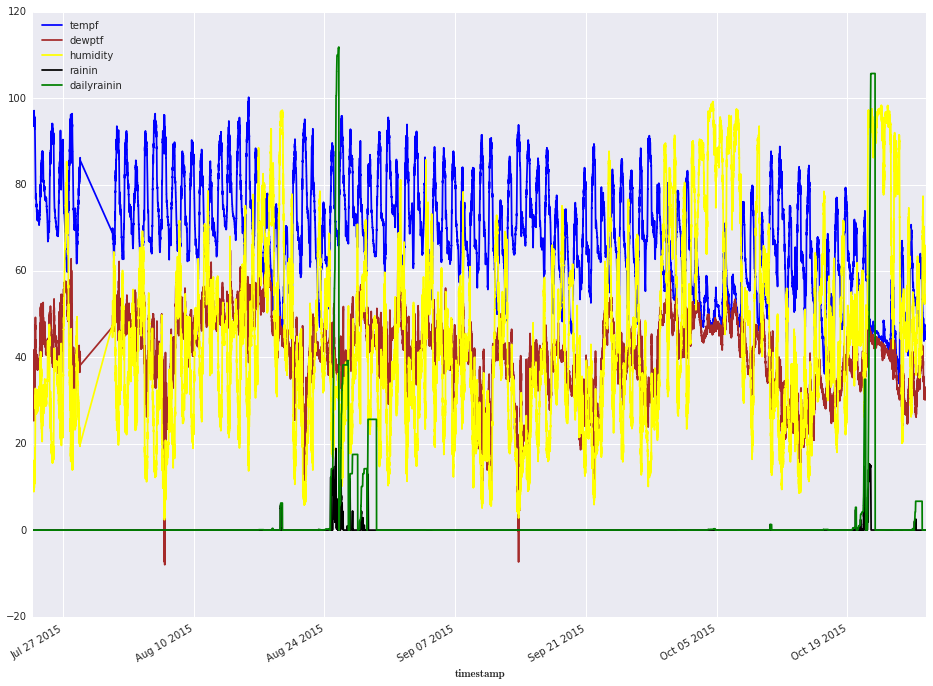

In [31]:
iot_data['tempf'].plot(figsize = (16, 12), legend = 'tempf', color = 'blue')
iot_data['dewptf'].plot(figsize = (16, 12), legend = 'dewptf', color = 'brown')
iot_data['humidity'].plot(figsize = (16, 12), legend = 'humidity', color = 'yellow')
iot_data['rainin'].plot(figsize = (16, 12), legend = 'rainin', color = 'black')
iot_data['dailyrainin'].plot(figsize = (16, 12), legend = 'dailyrainin', color = 'green')

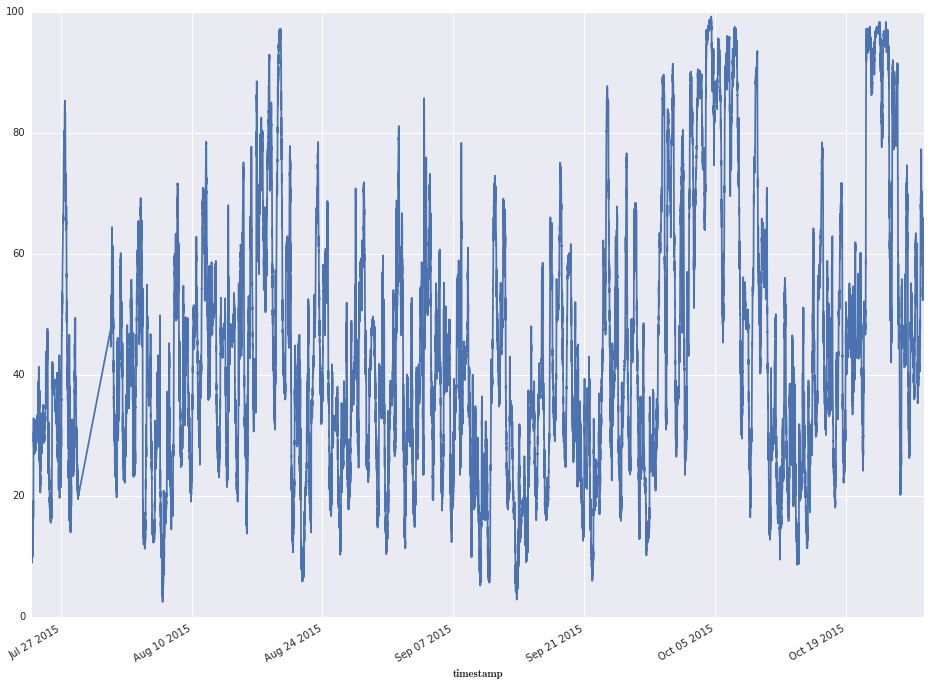

In [32]:
iot_data1['humidity'].plot(figsize=(16, 12))  

In [33]:
hum = iot_data['humidity']
hum.tail()

timestamp
2015-07-23 20:52:50.160000    9.3
2015-07-23 20:51:48.952000    9.1
2015-07-23 20:50:47.724000    9.0
2015-07-23 20:49:46.369000    9.0
2015-07-23 20:48:44.954000    9.5
Name: humidity, dtype: float64

In [34]:
hum = hum.tail(500)

In [35]:
# Moving Average Analysis
mavg = pd.rolling_mean(hum, 40)

In [36]:
mavg = pd.roll

AttributeError: 'module' object has no attribute 'roll'

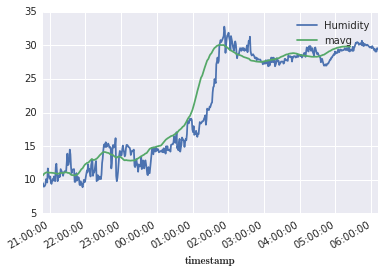

In [37]:
hum.plot(label = 'Humidity')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

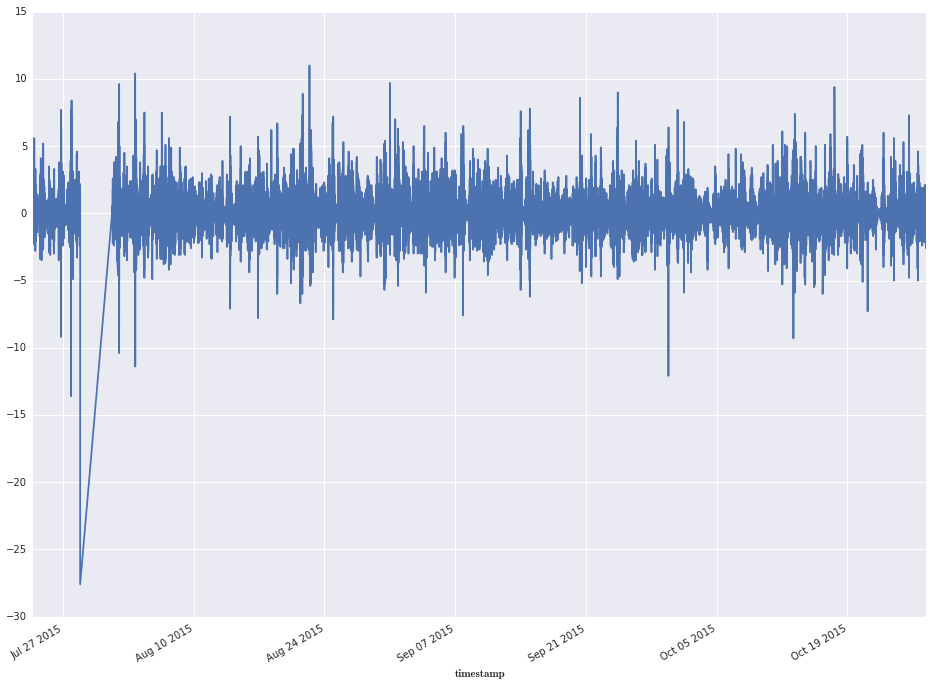

In [38]:
# Differencing 
iot_data['First Difference'] = iot_data['humidity'] - iot_data['humidity'].shift()  
iot_data['First Difference'].plot(figsize=(16, 12))  

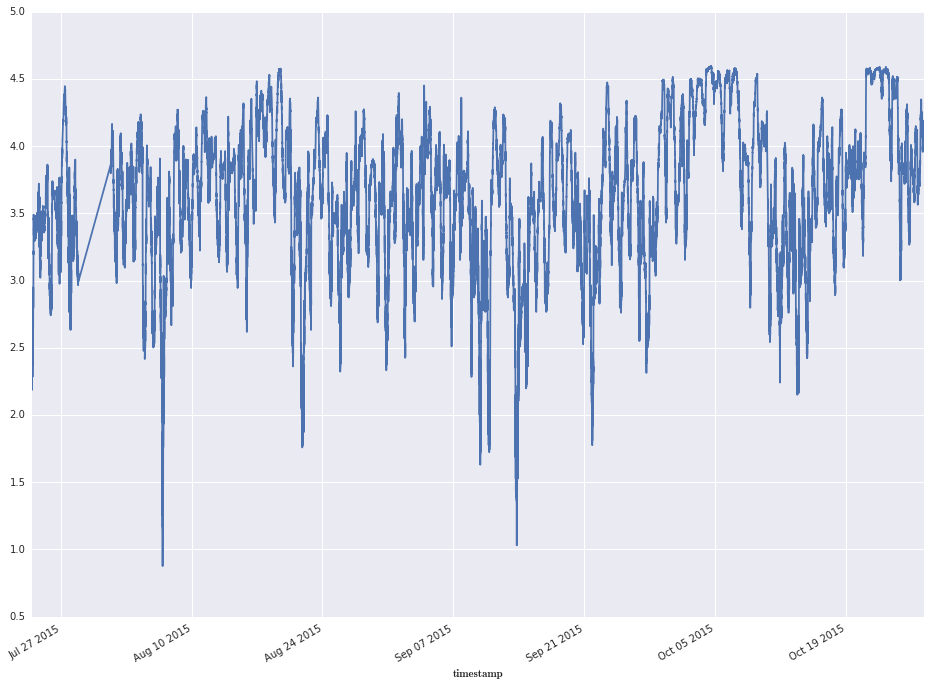

In [39]:
iot_data['Natural Log'] = iot_data['humidity'].apply(lambda x: np.log(x))  
iot_data['Natural Log'].plot(figsize=(16, 12))  

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


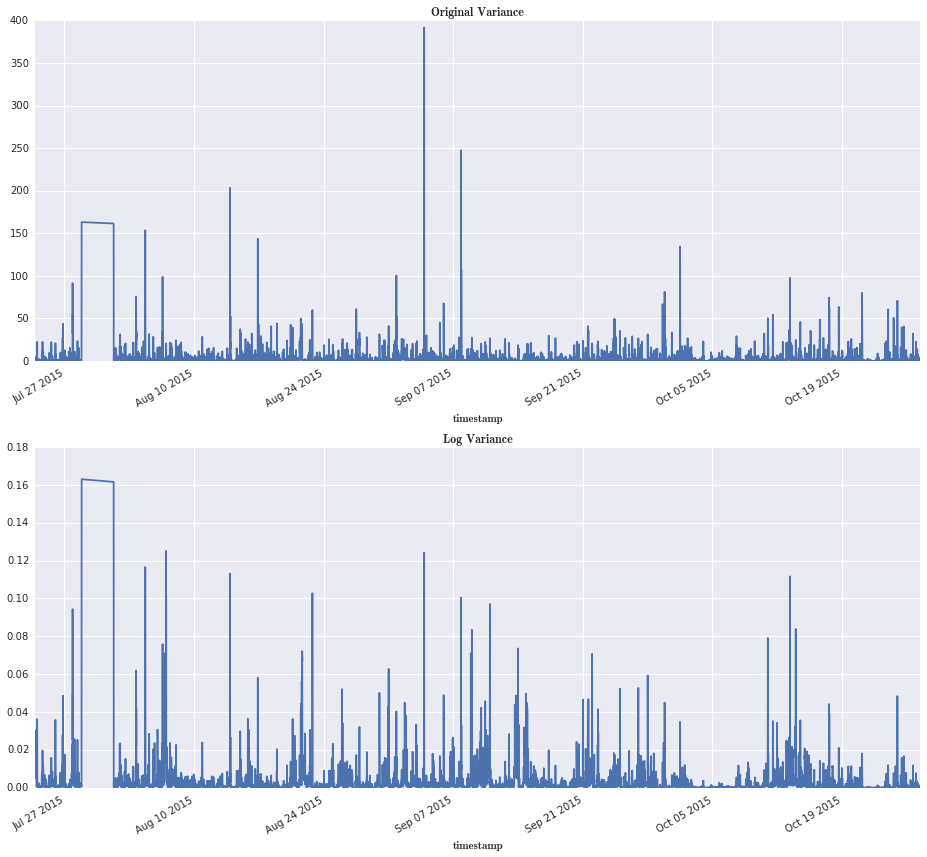

In [40]:
iot_data['Original Variance'] = pd.rolling_var(iot_data['humidity'], 30, min_periods=None, freq=None, center=True)  
iot_data['Log Variance'] = pd.rolling_var(iot_data['Natural Log'], 30, min_periods=None, freq=None, center=True)

fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
iot_data['Original Variance'].plot(ax=ax[0], title='Original Variance')  
iot_data['Log Variance'].plot(ax=ax[1], title='Log Variance')  
fig.tight_layout()  

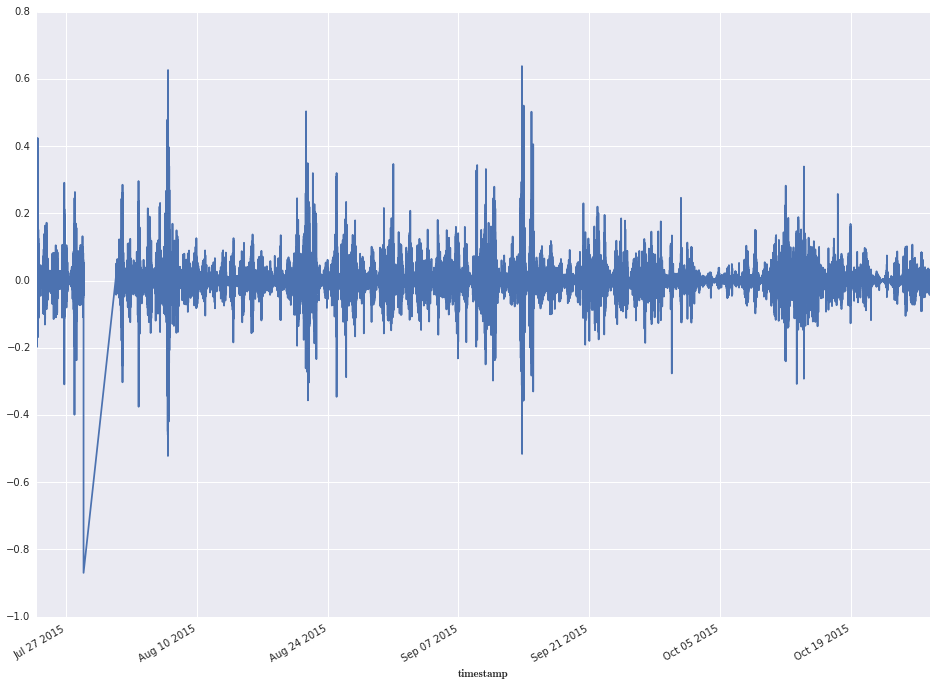

In [41]:
iot_data['Logged First Difference'] = iot_data['Natural Log'] - iot_data['Natural Log'].shift()  
iot_data['Logged First Difference'].plot(figsize=(16, 12))  

In [42]:
iot_data['Lag 1'] = iot_data['Logged First Difference'].shift()  
iot_data['Lag 2'] = iot_data['Logged First Difference'].shift(2)  
iot_data['Lag 5'] = iot_data['Logged First Difference'].shift(5)  
iot_data['Lag 30'] = iot_data['Logged First Difference'].shift(30)  

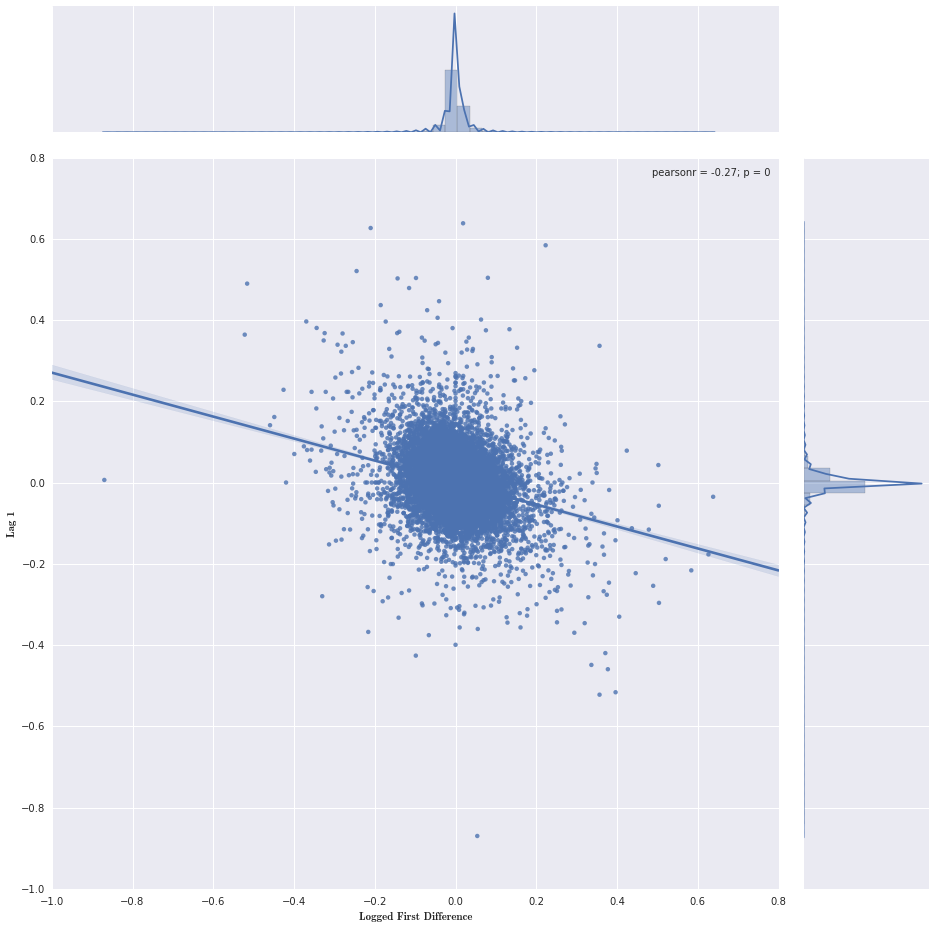

In [43]:
sb.jointplot('Logged First Difference', 'Lag 1', iot_data, kind='reg', size=13, dropna = True)  

In [44]:
# auto_correlation function and partial auto-correlation
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(iot_data['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(iot_data['Logged First Difference'].iloc[1:])  

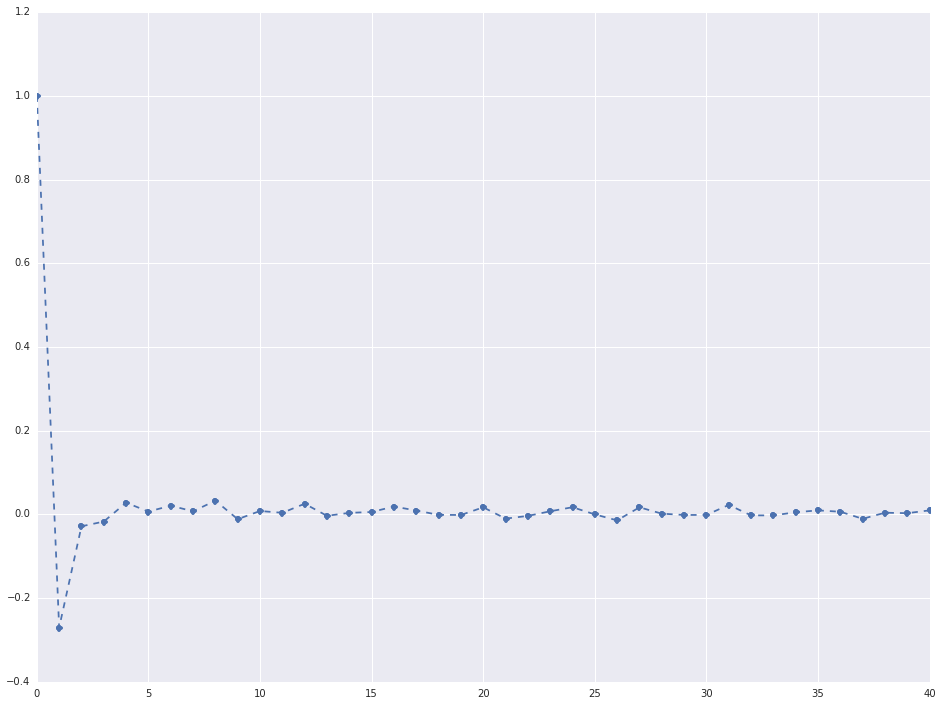

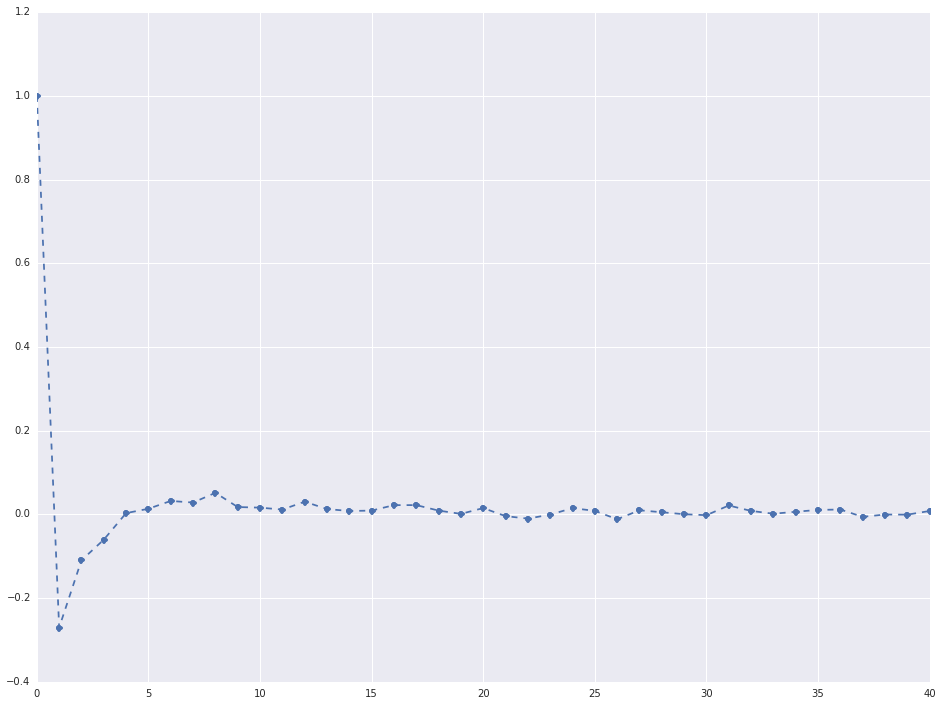

In [45]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')  

fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')  

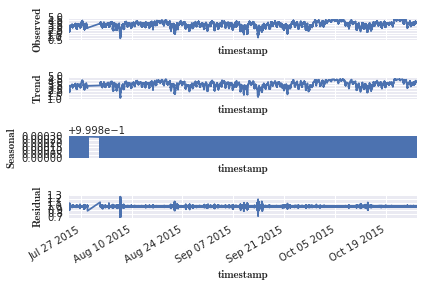

In [46]:
# Decomposition function 
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(iot_data['Natural Log'], model = 'multiplicative', freq = 10)  
fig = plt.figure()  
fig = decomposition.plot()  

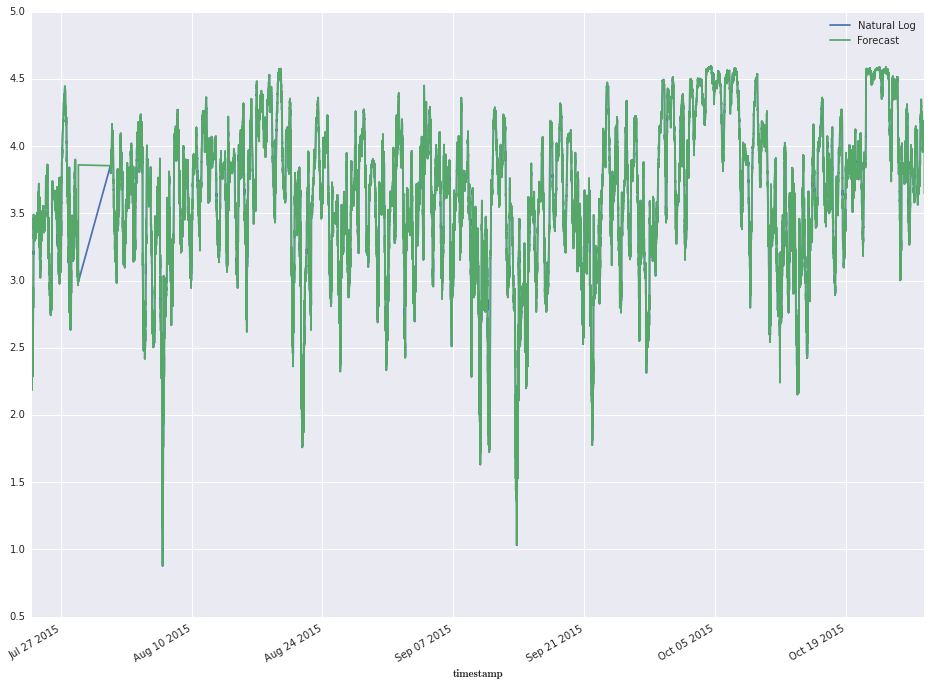

In [47]:
# Undifferenced Series Moving Average model
model = sm.tsa.ARIMA(iot_data['Natural Log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
iot_data['Forecast'] = results.fittedvalues  
iot_data[['Natural Log', 'Forecast']].plot(figsize=(16, 12))  

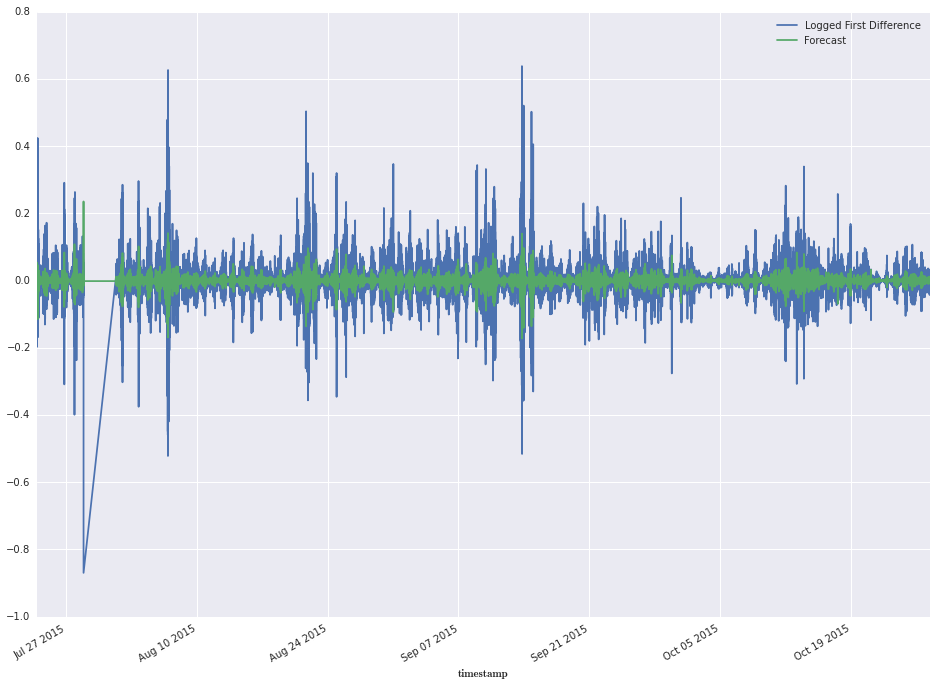

In [48]:
# Differenced Series Moving Average
model = sm.tsa.ARIMA(iot_data['Logged First Difference'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1, maxiter = 100)  
iot_data['Forecast'] = results.fittedvalues  
iot_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))  


In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Logged First Difference   No. Observations:               117750
Model:                          ARMA(1, 0)   Log Likelihood              249065.802
Method:                            css-mle   S.D. of innovations              0.029
Date:                     Mon, 04 Jan 2016   AIC                        -498125.603
Time:                             18:49:01   BIC                        -498096.575
Sample:                         10-27-2015   HQIC                       -498116.858
                              - 07-23-2015                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                         -1.648e-05   6.69e-05     -0.246      0.806        -0.000     0.000
ar.L1.Logged First Difference    -0.2704      0.003    -96.395      0.000        -0.276    -0.265
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.6976           +0.0000j            3.6976            0.5000
-----------------------------------------------------------------------------
"""

Since the coefficience between the variables is super low, predicting will be hard!

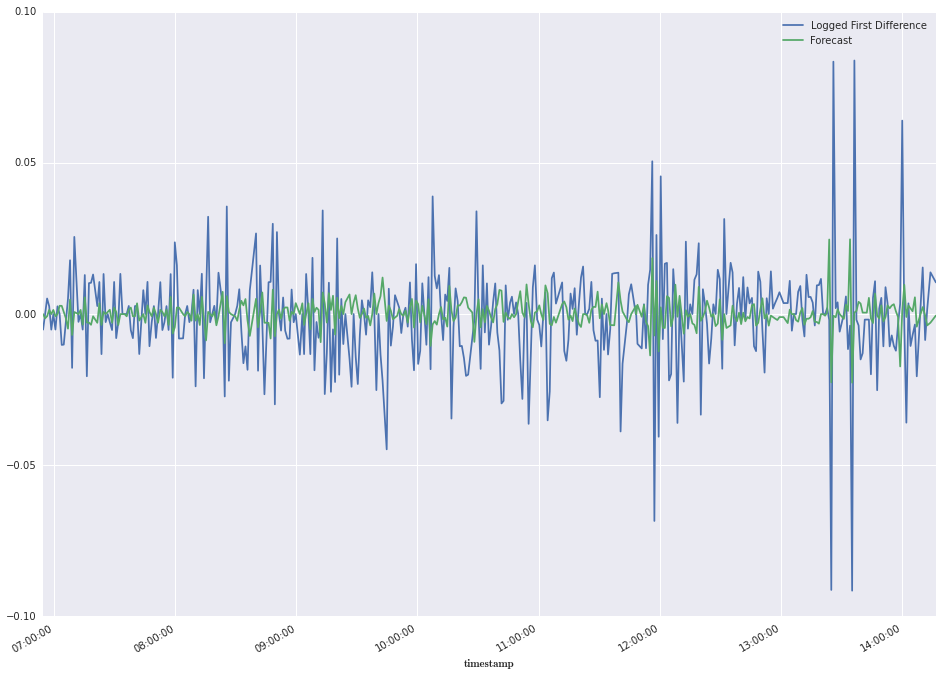

In [50]:
# Subset of the above model
iot_data[['Logged First Difference', 'Forecast']].iloc[1200:1600, :].plot(figsize=(16, 12))  

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


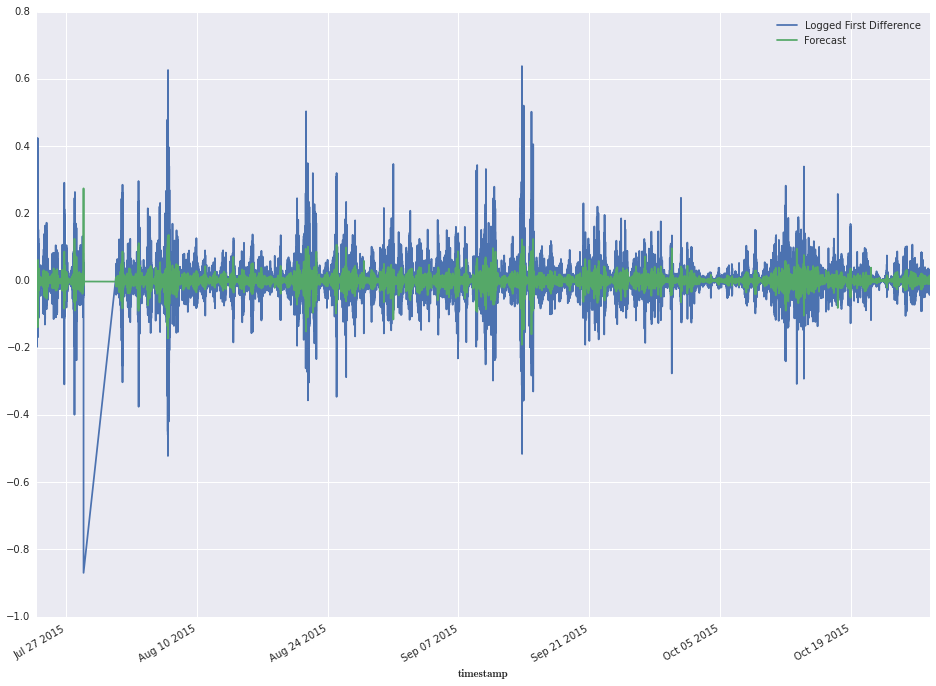

In [51]:
# Exponential Smoothing Model
model = sm.tsa.ARIMA(iot_data['Logged First Difference'].iloc[1:], order=(0, 0, 1))  
results1 = model.fit(disp=-1)  
iot_data['Forecast'] = results1.fittedvalues  
iot_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))  

In [52]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Logged First Difference   No. Observations:               117750
Model:                          ARMA(0, 1)   Log Likelihood              249871.417
Method:                            css-mle   S.D. of innovations              0.029
Date:                     Mon, 04 Jan 2016   AIC                        -499736.835
Time:                             18:49:23   BIC                        -499707.806
Sample:                         10-27-2015   HQIC                       -499728.089
                              - 07-23-2015                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                         -1.652e-05   5.78e-05     -0.286      0.775        -0.000  9.67e-05
ma.L1.Logged First Difference    -0.3163      0.003   -111.720      0.000        -0.322    -0.311
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.1615           +0.0000j            3.1615            0.0000
-----------------------------------------------------------------------------
"""

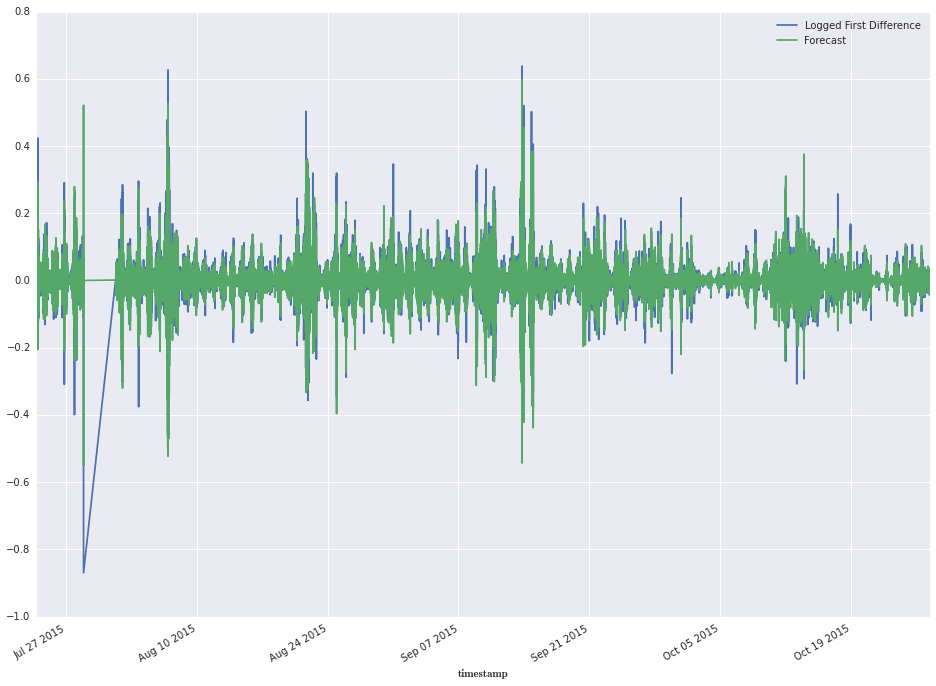

In [110]:
# Naive Forecasts
model = sm.tsa.ARIMA(iot_data['Logged First Difference'].iloc[1:], order=(1, 1, 0))  
results2 = model.fit(disp=-1)  
iot_data['Forecast'] = results2.fittedvalues  
iot_data[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))  

In [54]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Logged First Difference   No. Observations:               117749
Model:                        ARIMA(1, 1, 0)   Log Likelihood              215444.002
Method:                              css-mle   S.D. of innovations              0.039
Date:                       Mon, 04 Jan 2016   AIC                        -430882.004
Time:                               18:49:36   BIC                        -430852.975
Sample:                           10-27-2015   HQIC                       -430873.258
                                - 07-23-2015                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
const                            2.769e-07   7.09e-05      0.004      0.997        -0.000     0.000
ar.L1.D.Logged First Difference    -0.5952      0.002   -254.189      0.000        -0.600    -0.591
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6800           +0.0000j            1.6800            0.5000
-----------------------------------------------------------------------------
"""

In [104]:
prediction = results2.predict()
prediction.head()

2015-10-27 10:28:20.067000    0.000000
2015-10-27 10:26:53.279000   -0.003639
2015-10-27 10:26:13.432000    0.010032
2015-10-27 10:26:22.529000   -0.015513
2015-10-27 10:25:06.207000    0.008211
dtype: float64

In [106]:
predictions = pd.np.array(prediction)
predictions

array([  2.76903285e-07,  -3.63876048e-03,   1.00324008e-02, ...,
        -3.61786159e-02,  -6.36272001e-03,  -6.57681789e-03])

In [ ]:
results2.predict({'tempf' : [12], 'dewpt' : [1], 'baromin' : [2]})

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# <!-- collapse=True -->

# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

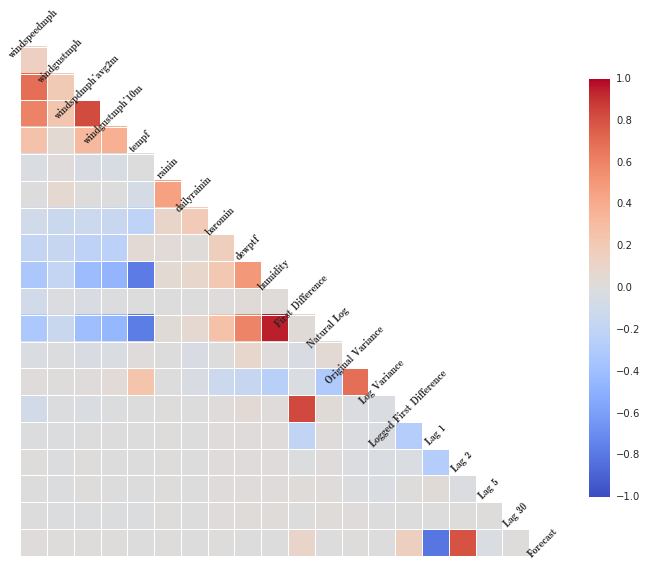

In [87]:
plt.figure(figsize=(12, 10))
_ = sns.corrplot(iot_data, annot=False)

In [1]:
cd /home/tebogo/notebooks/data_ana

/home/tebogo/notebooks/data_ana
